In [1]:
import numpy as np, matplotlib.pyplot as plt
import volpy as v
import sys, os

ModuleNotFoundError: No module named 'volpy'

In [ ]:
sys.path.append(os.path.join(os.getcwd(), "build")) #ninja

In [ ]:
print(v.bs_price(100,100,0.02,0.01,1.0,0.25, True))

10.300022208827253


In [3]:
g = v.bs_price_greeks(100,100,0.02,0.01,1.0,0.25, True)
g.delta, g.gamma, g.vega, g.theta, g.rho

(0.5599009112631625,
 0.015585304030313534,
 38.96326007578383,
 -5.2243079765595954,
 45.69006891748898)

In [ ]:
p = v.bs_price(100,100,0.02,0.01,1.0,0.25, True)

iv = v.implied_vol(100,100,0.02,0.01,1.0, p, True, 0.5, 1e-8)
iv.iv, iv.converged, iv.newton_iters

(0.2499999999999997, True, 4)

In [ ]:
analytic = v.bs_price(100,100,0.02,0.01,1.0,0.25, True)
t0 = time.time()
mc = v.mc_euro_gbm(100,100,0.02,0.01,1.0,0.25, True, 200_000, 42)
dt = time.time() - t0
analytic, mc.price, mc.stderr, mc.paths, f"{dt:.3f}s"

(10.300022208827253,
 10.301819237147956,
 0.007777576375011837,
 200000,
 '0.008s')

In [9]:
def iv7(S,K,r,q,T,price,is_call, v0=0.25, tol=1e-8):
    return v.implied_vol(float(S), float(K), float(r), float(q), float(T),
                            float(price), bool(is_call), float(v0), float(tol)).iv

ivs = [iv7(S, K, r, q, T, m, True) for K, m in zip(Ks, mids)]

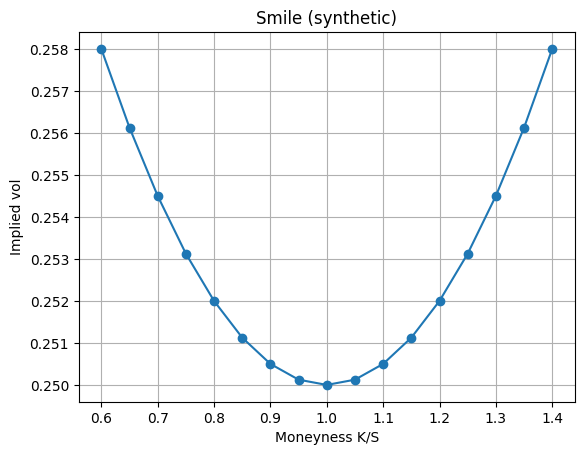

In [ ]:
S, r, q, T, true_vol = 100, 0.02, 0.01, 1.0, 0.25
Ks = np.linspace(60, 140, 17)
def true_smile(K):
    return 0.25 + 0.0005 * (K - 100)**2 / 100
mids = [v.bs_price(S, K, r, q, T, true_smile(K), True) for K in Ks]
ivs  = [v.implied_vol(S, K, r, q, T, m, True, 0.25, 1e-8).iv for K, m in zip(Ks, mids)]

plt.plot(Ks/S, ivs, marker='o')
plt.xlabel('Moneyness K/S'); plt.ylabel('Implied vol'); plt.title('Smile (synthetic)')
plt.grid(True); plt.show()